In [1]:
#fichiers contenant les fonctions utiles
import pandas as pd
from premiere_analyse import *
from testZ import testZ, proportions, testZ_cum
import matplotlib.pyplot as plt
import matplotlib.axes as ma
import statsmodels.tsa.api as smt
import statsmodels.api as sm

import numpy as np
import scipy.stats as st
import seaborn as sns
sns.set_style("white")

In [2]:
#données de la campagne
folder = 'C:/Users/Admin/Documents/Centrale Paris/3A/OMA/Projet 1000mercis/Donnees/'
annonceur = 'annonceur1/annonceur1'
campagne = 'annonceur1_campaign2_visite_2pages'
data = pd.read_hdf(folder + annonceur + '.hdf', key=campagne)

### 1. Tracer la différence relative entre les taux de conversion des groupes A et B en fonction du temps pour la campagne.

#### a. Différence relative des taux de conversion par jour, semaine et mois

In [3]:
freq_list = ["1D", "1W", "1M"]

conv_rate = {}
pct_change = {}
conv_count = {}

for freq in freq_list:
    conv_count[freq] = conversion_count_resample(data, freq)
    conv_rate[freq] = conversion_rate_resample(data, freq)
    pct_change[freq] = (conv_rate[freq]["A"] - conv_rate[freq]["B"]) / conv_rate[freq]["B"]


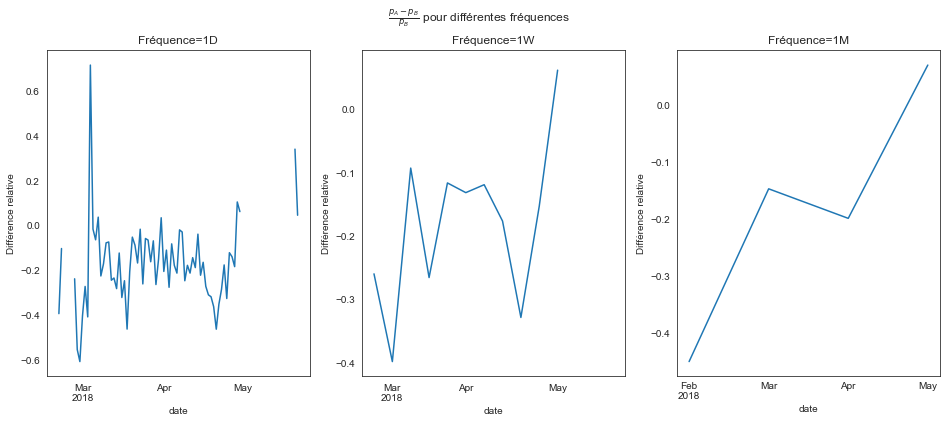

In [4]:
# trace des variations relatives du taux de conversion entre A et B pour frequences differentes
plt.figure(figsize=(16, 6))
for i, freq in enumerate(freq_list):
    plt.subplot(1, len(freq_list), i+1)
    pct_change[freq].plot(ax=plt.gca())
    plt.title(f"Fréquence={freq}")
    plt.ylabel('Différence relative')
plt.suptitle('$\\frac{p_A - p_B}{p_B}$ pour différentes fréquences')
plt.show()

Ci-dessus sont tracés les séries de la différence relative du taux de conversion entre A et B. Les trois graphiques correspondent respectivement à une agrégation du taux de conversion par jour, par semaine et par mois.
Ces tracés permettent d’avoir une première visualisation rapide des données et d’observer les
particularités, les différences facilement notables. Il s’agit en fait d’avoir une première idée de ce que l’on manipule.
L'utilisation de différents niveaux d'agrégation permet de comparer les taux à ces différentes échelles et de déterminer laquelle est la plus intéressante pour notre étude.

Ici, on remarque des grandes différences entre les différents niveaux d'agrégation, liées majoritairement au nombre de points disponibles. Le taux moyen par jour semble présenter une composante périodique alors que les taux par semaine et par mois manquent de points pour l'analyse. Le taux moyen par semaine présente néanmoins un début de composante périodique. 

#### b. Pattern journalier/hebdomadaire/mensuel sur la différence relative des taux journaliers?

In [3]:
dataA, dataB = preparer(data)

Conversion des index en dates
Moyennes des taux par jour et séparation en deux groupes A et B


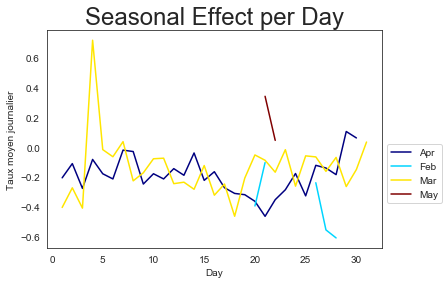

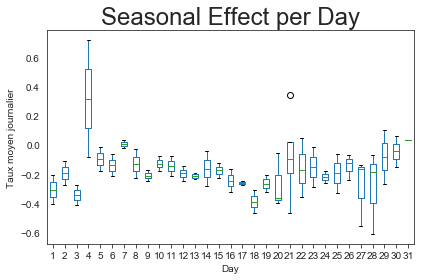

In [4]:
diff = (dataA['is_conv'] - dataB['is_conv']) /dataB['is_conv']
diff.index = pd.to_datetime(diff.index)
diff = pd.Series.to_frame(diff)
effet_journalier(diff)

Le premier graphe correspond au tracé de la série pour les différents mois afin de pouvoir les observer chacun séparément et d'identifier un motif commun s'il en est. Le second graphe présente les boxplots des taux de conversion par jour pour chaque jour du mois (par exemple, le premier boxplot est le boxplot des valeurs du 1er février, 1er mars, 1er avril et 1er mai).

Il est à noter que les mois n'ont pas le même nombre de jours et qu'il y a des données manquantes ce qui perturbe l'analyse.

On peut toutefois deviner un motif de fin et début de mois où le taux semble augmenter légèrement. Cela peut s'expliquer par le fait que les budgets des campagnes se décident en fin/début de mois et donc c'est à ce moment qu'une nouvelle campagne peut se lancer. Il faudrait davantage de données pour confirmer ce pattern.

### 2. Z_test et P_value cumulées

#### a. Pas d'un jour

In [5]:
Z_cum, P_rej, p_cum = testZ_cum(data)

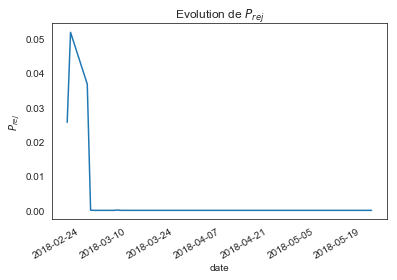

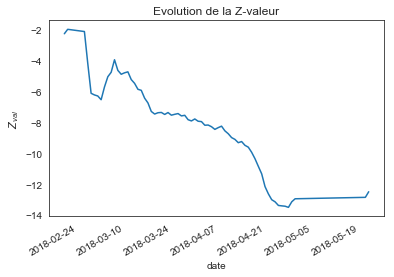

In [6]:
P_rej.plot(title='Evolution de $P_{rej}$', ax=plt.gca())
plt.ylabel('$P_{rej}$')
plt.show()


Z_cum.plot(title='Evolution de la Z-valeur', ax=plt.gca())
plt.ylabel('$Z_{val}$')
plt.show()

Nous tracons les graphiques des P-valeur et Z-valeur en fonction du temps, ceci nous permet d'avaluer la significativité du test au cours du temps puisque celle-ci dépend précisément de ces deux valeurs.

Nous observons une stabilité rapide de P (27 fev 2018), beaucoup plus lente pour Z (21 avril 2018). Cette différence est intéressante et est due à l'effet de la gaussienne dans la p-valeur, non présent dans la Z-valeur.

### 3. Évolution de la significativité du test

#### a. Significativité à 90%

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier :
100.0


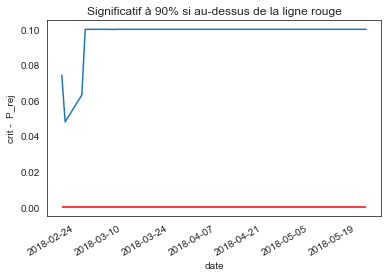

In [7]:
crit = 0.1 #90%

s =  - (P_rej - crit)  # il faut P_rej < crit, soit s > 0
   
s.plot(title="Significatif à 90% si au-dessus de la ligne rouge", ax=plt.gca())
plt.ylabel("crit -  P_rej")
plt.hlines(0,xmin = P_rej.index[0],xmax = P_rej.index[len(P_rej)-1], color = 'r')

print("Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier :")
print(round(sum((P_rej - crit < 0))/len(P_rej)*100,1))


Nous ajoutons au graphique précédent la ligne de significativité du test à 90%: le test est significatif si la p-valeur est plus petite qu'une certaine valeur critique, choisie ici à 0.1. Nous tracons donc la différence entre la valeur critique et la p-valeur du test qui doit être positive pour assurer la significativité du test.

Ici, la p-valeur est toujours inférieure à la valeur critique, le test est donc significatif, une version est meilleure que l'autre. Le signe de la Z-stattistique nous indique laquelle: en effet Z étant du signe de pA - pB, Z positif signifie une dominance de la version A, Z négatif une dominance de la version B en termes de conversions. La version B est en l'occurence meilleure que la A ici.


##### Par semaine

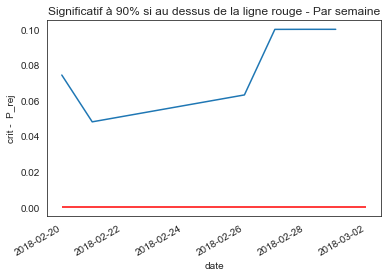

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


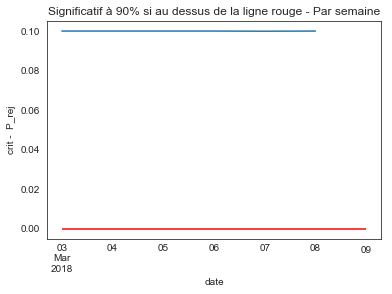

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


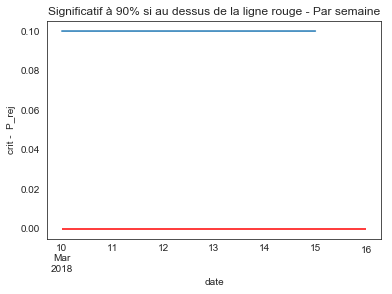

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


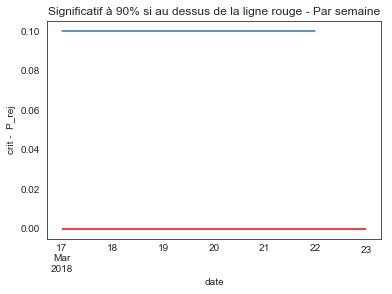

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


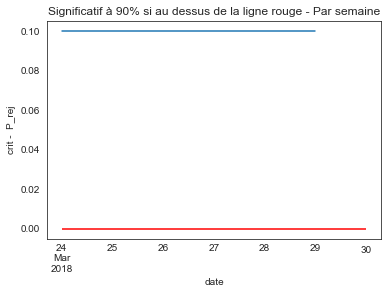

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


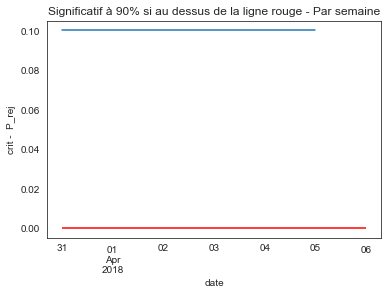

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


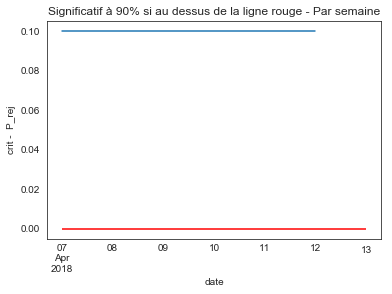

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


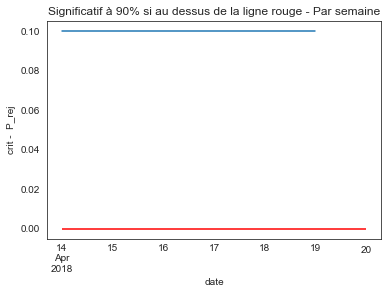

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


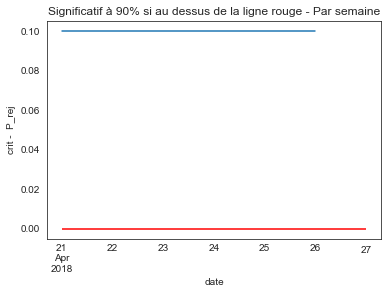

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:
100.0


In [8]:
for i in range(len(s)//7):
    s[7*i:7*(i+1)-1].plot(title="Significatif à 90% si au dessus de la ligne rouge - Par semaine", ax=plt.gca())
    plt.ylabel("crit -  P_rej")
    plt.hlines(0,xmin = P_rej.index[7*i],xmax = P_rej.index[7*(i+1)-1], color = 'r')
    plt.show()
    # pourcentage de p_val significative ie < crit
    print("Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur la semaine ci-dessus:")
    print(round(sum((s[7*i:7*(i+1)-1] > 0))/len(s[7*i:7*(i+1)-1])*100,1))
    


Nous tracons la significativité par semaine afin d'identifier des variations plus locales, dans notre cas, le test reste toujours significatif.

##### Par mois

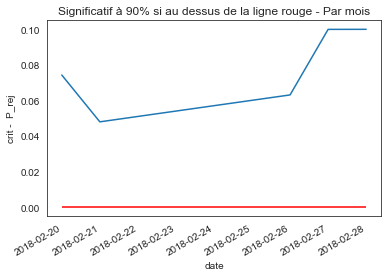

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:
100.0


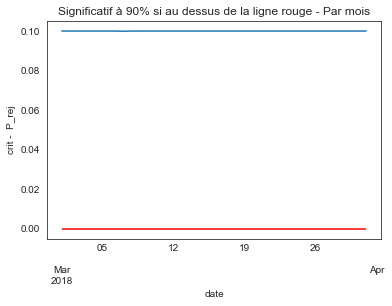

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:
100.0


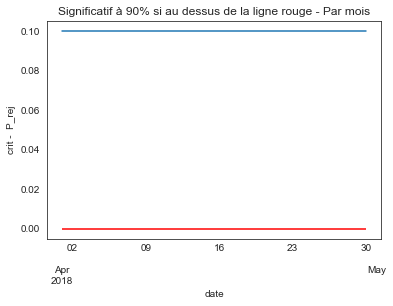

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:
100.0


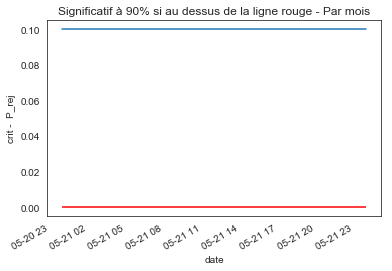

Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:
100.0


In [13]:
for month in ['2018-02', '2018-03','2018-04','2018-05']:
    s.loc[month].plot(title="Significatif à 90% si au dessus de la ligne rouge - Par mois", ax=plt.gca())
    plt.ylabel("crit -  P_rej")
    plt.hlines(0,xmin = P_rej.loc[month].index[0],xmax = P_rej.loc[month].index[len(P_rej.loc[month])-1], color = 'r')
    plt.show()
    
    print("Pourcentage de pvaleurs significatives à 90% du taux de conversion journalier sur le mois ci-dessus:")
    print(round(sum((s.loc[month] > 0))/len(s.loc[month])*100,1))

Nous tracons de même la significativité par mois. Le test reste significatif bien sûr.

#### b. Significativité à 80%

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier :
100.0


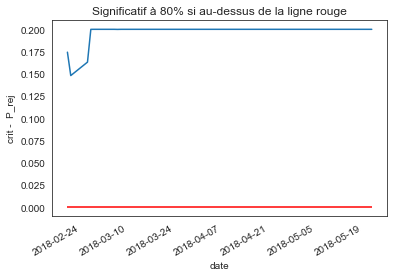

In [14]:
crit = 0.2 #80%

s = - (P_rej - crit)

s.plot(title="Significatif à 80% si au-dessus de la ligne rouge", ax=plt.gca())
plt.ylabel("crit -  P_rej")
plt.hlines(0,xmin = P_rej.index[0],xmax = P_rej.index[len(P_rej)-1], color = 'r')

print("Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier :")
print(round(sum((P_rej - crit <= 0))/len(P_rej)*100,1))

Nous recommencons l'analyse avec un seuil de significativité moins élevé : 80%. Le test est bien significatif à 80%, la version B est la meilleure.

##### Par semaine

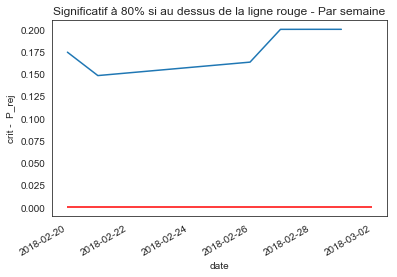

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


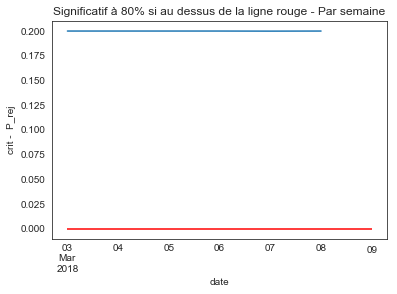

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


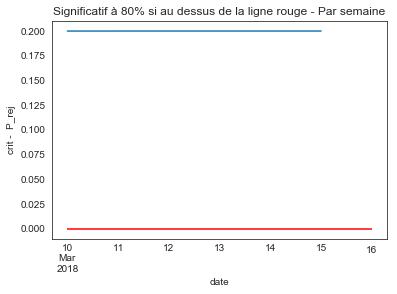

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


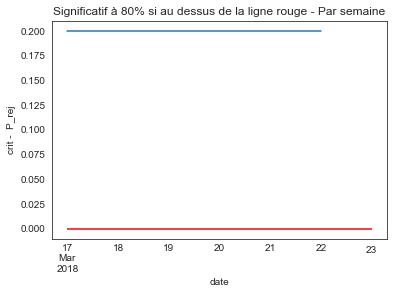

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


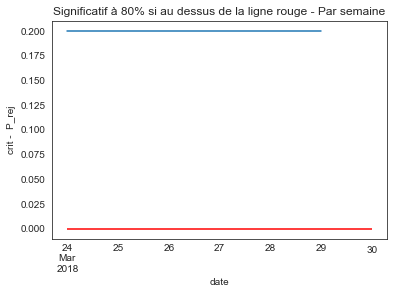

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


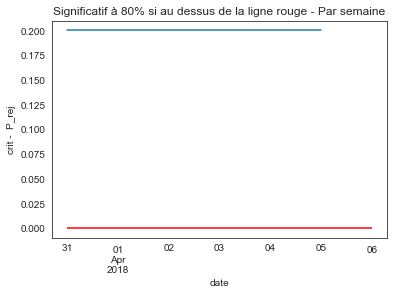

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


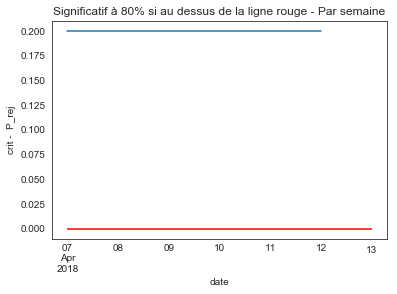

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


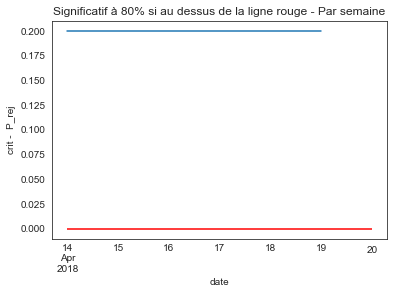

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


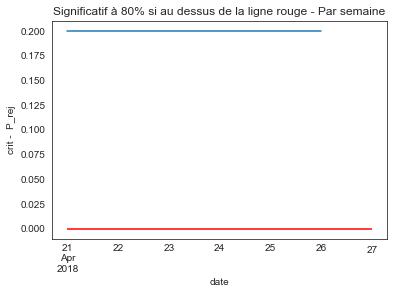

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:
100.0


In [15]:
for i in range(len(s)//7):
    s[7*i:7*(i+1)-1].plot(title="Significatif à 80% si au dessus de la ligne rouge - Par semaine", ax=plt.gca())
    plt.ylabel("crit -  P_rej")
    plt.hlines(0,xmin = P_rej.index[7*i],xmax = P_rej.index[7*(i+1)-1], color = 'r')
    plt.show()
    
    print("Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur la semaine ci-dessus:")
    print(round(sum((s[7*i:7*(i+1)-1] > 0))/len(s[7*i:7*(i+1)-1])*100,1))

##### Par mois


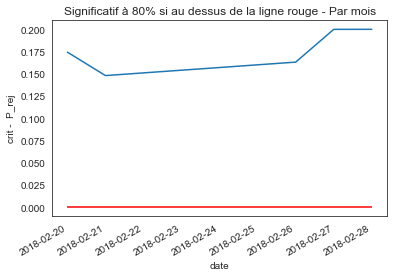

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:
100.0


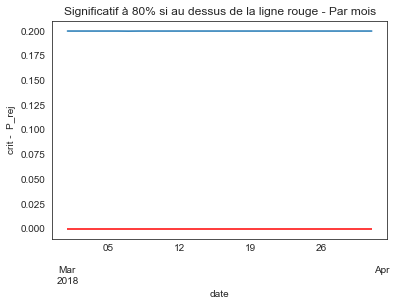

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:
100.0


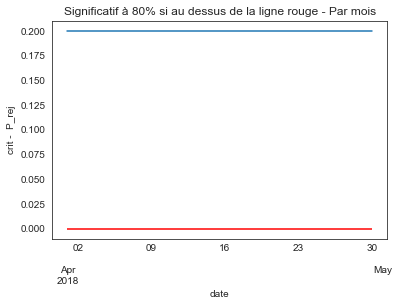

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:
100.0


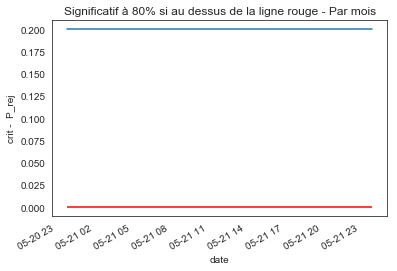

Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:
100.0


In [16]:
for month in ['2018-02', '2018-03','2018-04','2018-05']:
    s.loc[month].plot(title="Significatif à 80% si au dessus de la ligne rouge - Par mois", ax=plt.gca())
    plt.ylabel("crit -  P_rej")
    plt.hlines(0,xmin = P_rej.loc[month].index[0],xmax = P_rej.loc[month].index[len(P_rej.loc[month])-1], color = 'r')
    plt.show()
    
    print("Pourcentage de pvaleurs significatives à 80% du taux de conversion journalier sur le mois ci-dessus:")
    print(round(sum((s.loc[month] > 0))/len(s.loc[month])*100,1))

Nous n'observons sans surprise aucune variation dans un mois ou une semaine, le test est toujours significatif.

### 4. Stationnarité de la série de la différence relative des taux de conversion journaliers

In [5]:
adf_test(diff['is_conv'])

,Results of Augmented Dickey-Fuller test:
test statistic,-3.510210
p-value,0.007729
# of lags,1.000000
# of observations,66.000000
Critical Value (1%),-3.533560
Critical Value (5%),-2.906444
Critical Value (10%),-2.590724


La stationnarité de la série est évaluée grâce au test de Dickey-Fuller, ce qui engendrera ou non des transformations diférentielle ou logarithmique sur la série. L’intérêt de cette étude est de déterminer si la série est stationnaire et la tranformer si ce n’est pas le cas. En effet, la moyenne d’une série stationnaire ne dépend pas du temps, ni même sa fonction de convariance, il est donc plus aisé de manipuler des séries stationnaires.

Ici, la statistique de test est très légèrement supérieure à la valeur critique à 1%, la série est presque stationnaire. Elle l'est de manière certaine après différenciation au 1er ordre:

In [6]:
adf_test(np.diff(diff['is_conv']))

,Results of Augmented Dickey-Fuller test:
test statistic,-1.348981e+01
p-value,3.122245e-25
# of lags,0.000000e+00
# of observations,6.600000e+01
Critical Value (1%),-3.533560e+00
Critical Value (5%),-2.906444e+00
Critical Value (10%),-2.590724e+00


La série différenciée une fois est stationnaire et le test donne B comme meilleure version de la bannière.